# Test scripts for combat
As the entire combat system of prototype is made from scratch the choosen dice and armor/weapon stats need to be tested and verified to be playable and do not break the game.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import time
np.set_printoptions(suppress=True)

## damage propability
The next code block tests the overall chances of different damage outputs. Apart from the level of the attacker and the level of the defender and weapon stats can be taken into account.

Propability of inflicting no damage is: 0.3353%
Propability of inflicting damage is: 0.6647000000000001%

Propability of inflicting 0dmg is: 0.3353%
Propability of inflicting 1dmg is: 0.0%
Propability of inflicting 2dmg is: 0.0%
Propability of inflicting 3dmg is: 0.0%
Propability of inflicting 4dmg is: 0.0%
Propability of inflicting 5dmg is: 0.0047%
Propability of inflicting 6dmg is: 0.0142%
Propability of inflicting 7dmg is: 0.0209%
Propability of inflicting 8dmg is: 0.0263%
Propability of inflicting 9dmg is: 0.0333%
Propability of inflicting 10dmg is: 0.0368%
Propability of inflicting 11dmg is: 0.0483%
Propability of inflicting 12dmg is: 0.0548%
Propability of inflicting 13dmg is: 0.0633%
Propability of inflicting 14dmg is: 0.0626%
Propability of inflicting 15dmg is: 0.059%
Propability of inflicting 16dmg is: 0.0522%
Propability of inflicting 17dmg is: 0.0442%
Propability of inflicting 18dmg is: 0.0415%
Propability of inflicting 19dmg is: 0.0338%
Propability of inflicting 20dmg is: 0

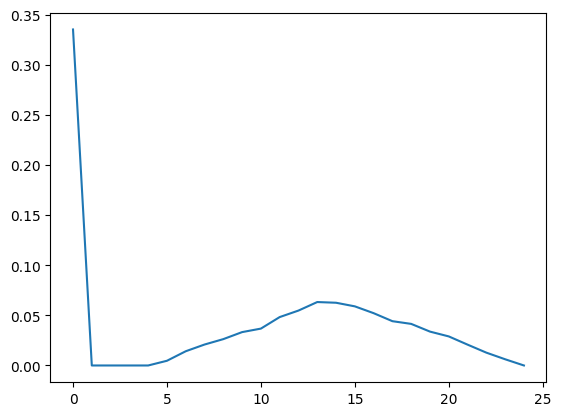

In [22]:
rolls = 10000

def attackRoll_propability(attackLevel, monsterLevel, weaponDamage, damageBonus, lifeSteal, dicetypeRoll, dicetypeDamage):
    maxdamage = weaponDamage*dicetypeDamage+damageBonus+lifeSteal
    damageProbabilitities = np.zeros(maxdamage)
    for i in range(rolls):
        highestPlayer = 0
        highestMonster = 0

        for j in range(attackLevel):
            roll = randrange(dicetypeRoll)
            if(highestPlayer < roll):
                highestPlayer = roll

        for j in range(monsterLevel):
            roll = randrange(dicetypeRoll)
            if(highestMonster < roll):
                highestMonster = roll

        damage = 0
        if(highestMonster < highestPlayer):
            for j in range(weaponDamage):
                damage += randrange(dicetypeDamage)
            damage += damageBonus + lifeSteal

        if(damage < 0):
            damage = 0

        damageProbabilitities[damage] = damageProbabilitities[damage]+1

    #returning percentiles
    damageProbabilitities /= rolls

    noDamagePropability = damageProbabilitities[0]
    damagePropability = np.sum(damageProbabilitities) - damageProbabilitities[0]

    print("Propability of inflicting no damage is: " + str(str(noDamagePropability) + "%"))
    print("Propability of inflicting damage is: " + str(str(damagePropability) + "%"))
    print()

    for i in range(maxdamage):
        print("Propability of inflicting " + str(i) + "dmg is: " + str(damageProbabilitities[i]) + "%") 
    plt.plot(damageProbabilitities)

#Combat testing
attackRoll_propability(attackLevel=2, monsterLevel=1, weaponDamage=2, damageBonus=5, lifeSteal=0, dicetypeRoll=100, dicetypeDamage=10)

## average damage
To determine wether the choosen stats are balanced the overall average damage output can be tested with this script.

In [39]:
rolls = 10000

def attackRoll_average(attackLevel, monsterLevel, weaponDamage, damageBonus, lifeSteal, dicetypeRoll, dicetypeDamage):
    averageDamage = np.zeros(0)
    for i in range(rolls):
        highestPlayer = 0
        highestMonster = 0

        for j in range(attackLevel):
            roll = randrange(dicetypeRoll)
            if(highestPlayer < roll):
                highestPlayer = roll

        for j in range(monsterLevel):
            roll = randrange(dicetypeRoll)
            if(highestMonster < roll):
                highestMonster = roll

        damage = 0
        if(highestMonster < highestPlayer):
            for j in range(weaponDamage):
                damage += randrange(dicetypeDamage)
            damage += damageBonus + lifeSteal

        if(damage < 0):
            damage = 0

        averageDamage = np.append(averageDamage, damage)

    print("The average damage done is: " + str(np.mean(averageDamage)))

    
#testing average damage
attackRoll_average(attackLevel=1, monsterLevel=1, weaponDamage=2, damageBonus=0, lifeSteal=0, dicetypeRoll=100, dicetypeDamage=10)

The average damage done is: 4.5047


## oneVSone combat simulation
In order to balance parts of the game mechanics and stats for armour, weapons and skills a rough combat simulator is needed. However, instead of simulating an entire encouter with multiple player and enemies, only a oneVSone fight with a single handed weapon will be simulated.

In [16]:
def oneVSone(playerHealth, attackLevel, defenseLevel, weaponRollBonus, weaponDamage, weaponDamageBonus, lifeSteal, armourBonus, monsterHealth, monsterLevel, dicetypeRoll, dicetypeDamage):
    fighting = True
    turns = 0
    healthPlayer= playerHealth
    healthMonster = monsterHealth

    print("player has: " + str(healthPlayer) + "hp")
    print("monster has: " + str(monsterHealth) + "hp")
    print()

    while fighting:
        turns += 1
        #two attacks, second attack is one level lower
        levelOfAttack = attackLevel
        for i in range(2):
            #attack 1 of player
            highestPlayer = 0
            highestMonster = 0

            for j in range(levelOfAttack):
                rollPlayer = randrange(dicetypeRoll)
                if(rollPlayer>highestPlayer):
                    highestPlayer = rollPlayer

            for j in range(monsterLevel):
                rollMonster = randrange(dicetypeRoll)
                if(rollMonster>highestMonster):
                    highestMonster = rollMonster
            
            if(highestMonster<=highestPlayer+weaponRollBonus):
                damage = 0
                for j in range(weaponDamage):
                    damage += randrange(dicetypeDamage)+1
                damage += weaponDamageBonus
                healthMonster -= damage
                healthPlayer += lifeSteal

                print("player hit")
                print("monster took: " + str(damage) + "dmg")
                print("monster has: " + str(healthMonster) + "hp")
                print()
            else:
                print("player missed")
                print()

            if(healthPlayer <= 0):
                break
            #decreasing the level of attack
            levelOfAttack -= 1
        if(healthPlayer <= 0):
            print("player is dead")
            print("fight took: " + str(turns) + " turns")
            fighting = False
            break

        #attacks of the monster, every next attack is a level lower
        levelOfAttack = monsterLevel
        for i in range(levelOfAttack):
            highestMonster = 0
            highestPlayer = 0

            for j in range(levelOfAttack):
                rollMonster = randrange(dicetypeRoll)
                if(rollMonster>highestMonster):
                    highestMonster = rollMonster

            for j in range(defenseLevel):
                rollPlayer = randrange(dicetypeRoll)
                if(rollPlayer>highestPlayer):
                    highestPlayer = rollPlayer

            if(highestPlayer+armourBonus<highestMonster):
                damage = 0
                for j in range(monsterLevel):
                    damage += randrange(dicetypeDamage)+1
                healthPlayer -= damage

                print("monster hit")
                print("player took: " + str(damage) + "dmg")
                print("player has: " + str(healthPlayer) + "hp")
                print()
            else:
                print("monster missed")
                print()

            if(healthMonster <= 0):
                print("monster is dead")
                print("fight took: " + str(turns) + " turns")
                fighting = False
                break
            #decreasing the level of attack
            levelOfAttack -= 1

oneVSone(playerHealth=100, attackLevel=2, defenseLevel=2, weaponRollBonus=0, weaponDamage=2, weaponDamageBonus=0, lifeSteal=5, armourBonus=0, monsterHealth=160, monsterLevel=5, dicetypeRoll=100, dicetypeDamage=10)

player has: 100hp
monster has: 100hp

player missed

player hit
monster took: 10dmg
monster has: 90hp

monster hit
player took: 3dmg
player has: 97hp

monster missed

player missed

player missed

monster missed

monster missed

player hit
monster took: 9dmg
monster has: 81hp

player missed

monster hit
player took: 5dmg
player has: 92hp

monster missed

player missed

player missed

monster missed

monster missed

player missed

player missed

monster hit
player took: 6dmg
player has: 86hp

monster missed

player hit
monster took: 14dmg
monster has: 67hp

player missed

monster missed

monster hit
player took: 2dmg
player has: 84hp

player missed

player missed

monster missed

monster missed

player missed

player missed

monster missed

monster missed

player missed

player missed

monster missed

monster missed

player hit
monster took: 17dmg
monster has: 50hp

player hit
monster took: 14dmg
monster has: 36hp

monster hit
player took: 10dmg
player has: 74hp

monster missed

player 

## probability of oneVSone combat simulation

In [54]:
fights = 10000

def probability_oneVSone(playerHealth, attackLevel, defenseLevel, weaponRollBonus, weaponDamage, weaponDamageBonus, lifeSteal, armourBonus, monsterHealth, monsterLevel, dicetypeRoll, dicetypeDamage):
    probabilityofdeaths = np.zeros(2)
    for currentfight in range(fights):
        fighting = True
        healthPlayer= playerHealth
        healthMonster = monsterHealth

        while fighting:
            #two attacks, second attack is one level lower
            levelOfAttack = attackLevel
            for i in range(2):
                #attack 1 of player
                highestPlayer = 0
                highestMonster = 0

                for j in range(levelOfAttack):
                    rollPlayer = randrange(dicetypeRoll)
                    if(rollPlayer>highestPlayer):
                        highestPlayer = rollPlayer

                for j in range(monsterLevel):
                    rollMonster = randrange(dicetypeRoll)
                    if(rollMonster>highestMonster):
                        highestMonster = rollMonster
                
                if(highestMonster<=highestPlayer+weaponRollBonus):
                    damage = 0
                    for j in range(weaponDamage):
                        damage += randrange(dicetypeDamage)+1
                    damage += weaponDamageBonus
                    healthMonster -= damage
                    healthPlayer += lifeSteal

                if(healthPlayer <= 0):
                    break
                #decreasing the level of attack
                levelOfAttack -= 1
            if(healthPlayer <= 0):
                probabilityofdeaths[0] += 1
                fighting = False
                break

            #attacks of the monster, every next attack is a level lower
            levelOfAttack = monsterLevel
            for i in range(levelOfAttack):
                highestMonster = 0
                highestPlayer = 0

                for j in range(levelOfAttack):
                    rollMonster = randrange(dicetypeRoll)
                    if(rollMonster>highestMonster):
                        highestMonster = rollMonster

                for j in range(defenseLevel):
                    rollPlayer = randrange(dicetypeRoll)
                    if(rollPlayer>highestPlayer):
                        highestPlayer = rollPlayer

                if(highestPlayer+armourBonus<highestMonster):
                    damage = 0
                    for j in range(monsterLevel):
                        damage += randrange(dicetypeDamage)+1
                    healthPlayer -= damage

                if(healthMonster <= 0):
                    probabilityofdeaths[1] += 1
                    fighting = False
                    break
                #decreasing the level of attack
                levelOfAttack -= 1

    probabilityofdeaths /= fights
    print("The propability of the player dying is: " + str(probabilityofdeaths[0]) + "%")
    print("The propability of the monster dying is: " + str(probabilityofdeaths[1]) + "%")

probability_oneVSone(playerHealth=100, attackLevel=3, defenseLevel=4, weaponRollBonus=10, weaponDamage=2, weaponDamageBonus=10, lifeSteal=10, armourBonus=0, monsterHealth=120, monsterLevel=4, dicetypeRoll=100, dicetypeDamage=10)

The propability of the player dying is: 0.4407%
The propability of the monster dying is: 0.5593%
